In [1]:
## Loading the CIFARI-10 data

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [3]:
## Pre Processing the data

K = len(np.unique(y_train)) # Classes(Finds the unique labels in y_train)
Ntr = x_train.shape[0] # no. of training examples
Nte = x_test.shape[0] # no. of test examples
Din = 3072 # CIFAR10 32*32*3 the total intensity values in the RGB image
# Din = 784 # MINIST

# Normalize pixel values (Mean normalization is done here)
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) #takes the pixel wise mean for all the images
x_train = x_train - mean_image
x_test = x_test - mean_image

'''there are 10 classes in CIFARI-10 and the Y gives values form 0-9,
these are converted to a bonary matrix i such a way that the index of the matrix will represent one(1) eg. [0,0,0,0,0,0,1,0,0,0] for y = 6'''
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#each row gives the image pixel values
x_train = np.reshape(x_train,(Ntr,Din)) 
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std = 1e-5 #standard deviation  for initializing a random W
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

'''for a given training example the optimization process will be much more convinient if we can append the bias to the w1 matrix
'''
#updating the x_train and x_test
x_train_new = np.concatenate((np.ones((Ntr,1)), x_train), axis = 1)
x_test_new = np.concatenate((np.ones((Nte,1)), x_test), axis = 1)

#updating the w1 by concatenating with the bias vector
w1 = np.concatenate((b1.reshape(1, K), w1), axis = 0)

print('x_train_new: ', x_train_new.shape)
print('x_test_new: ', x_test_new.shape)
print('w1: ', w1.shape)

w1: (3072, 10)
b1: (10,)
x_train_new:  (50000, 3073)
x_test_new:  (10000, 3073)
w1:  (3073, 10)


In [4]:
m = Ntr #batch_size
iterations = 300
lr = 2.e-2
lr_decay = 0.99
lr_history = []
reg = 5e-5 #regularization coefficient
loss_history = []
train_acc_history = [] #training accuracy
val_acc_history = [] #validation accuracy history


#-----------------------------------------------------------------
def calc_accuracy(y_predicted, y_check):
    y_predicted = np.argmax(y_predicted, axis = 1)#finds the maximum value index in each row(prediction)
    y_check = np.argmax(y_check, axis = 1)
    accuracy = np.sum(y_predicted == y_check)/len(y_check)
    return accuracy*100
#-----------------------------------------------------------------

for t in range(1,iterations+1):
    #-----------------------------------------------------------------
    # FORWARD PASS

    h_theta = np.matmul(x_train_new, w1) #calculating the hypothesis

    loss = (1/(2*m))*np.sum((h_theta - y_train)**2) + (reg/(2*m))*np.sum(w1**2) #mean sum of squared errors. Here the bias term is not considered for regularitation. This summing goves the row wise summation

    
    # BACKWARD PASS (IMplementing Gradient Descent)

    #differentiate w.r.t w1
    d_loss = (1/m)*np.matmul(x_train_new.T, (h_theta - y_train))+ (reg/m)*w1 
    w1 = w1 - lr*d_loss
    #------------------------------------------------------------------

    #calculations and appending
    loss_history.append(loss)

    train_accuracy = calc_accuracy(h_theta, y_train)
    train_acc_history.append(train_accuracy)

                #lets check the results with current w1 for test data
    h_theta_test = np.matmul(x_test_new, w1)
    validation_accuracy = calc_accuracy(h_theta_test, y_test)
    val_acc_history.append(validation_accuracy)

    lr_history.append(lr)
    #----------------------------------------------------------------------

    # Printing accuracies and displaying w as images
    if (t == 1 or t % 30 == 0):
        print('Iteration: %d/%d , Loss: %f , Training_accuracy: %f , Validation_accuracy: %f , Lr: %f'%(t, iterations, loss, train_accuracy, validation_accuracy, lr))
    #decay the learning rate
    lr = lr*lr_decay


print("Training Done!!")
print("Loss: ", loss) #final loss
print("Training_accuracy: ",train_accuracy) #final training accuracy
print("Test_accuracy: ", validation_accuracy) #final test accuracy
print('Learning Rate:', lr)

Iteration: 1/300 , Loss: 0.499986 , Training_accuracy: 11.288000 , Validation_accuracy: 24.900000 , Lr: 0.020000
Iteration: 30/300 , Loss: 0.423726 , Training_accuracy: 36.966000 , Validation_accuracy: 37.310000 , Lr: 0.014943
Iteration: 60/300 , Loss: 0.410274 , Training_accuracy: 38.368000 , Validation_accuracy: 38.420000 , Lr: 0.011054
Iteration: 90/300 , Loss: 0.405026 , Training_accuracy: 38.934000 , Validation_accuracy: 38.900000 , Lr: 0.008176
Iteration: 120/300 , Loss: 0.402498 , Training_accuracy: 39.350000 , Validation_accuracy: 39.040000 , Lr: 0.006048
Iteration: 150/300 , Loss: 0.401101 , Training_accuracy: 39.514000 , Validation_accuracy: 39.150000 , Lr: 0.004474
Iteration: 180/300 , Loss: 0.400257 , Training_accuracy: 39.632000 , Validation_accuracy: 39.230000 , Lr: 0.003309
Iteration: 210/300 , Loss: 0.399714 , Training_accuracy: 39.712000 , Validation_accuracy: 39.250000 , Lr: 0.002448
Iteration: 240/300 , Loss: 0.399351 , Training_accuracy: 39.782000 , Validation_accur

(3072, 10)


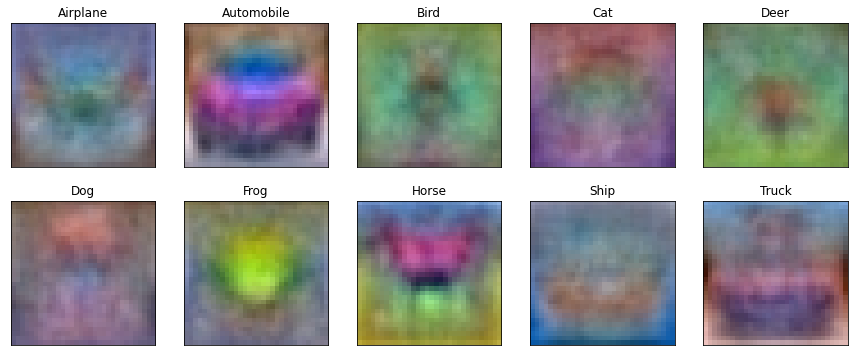

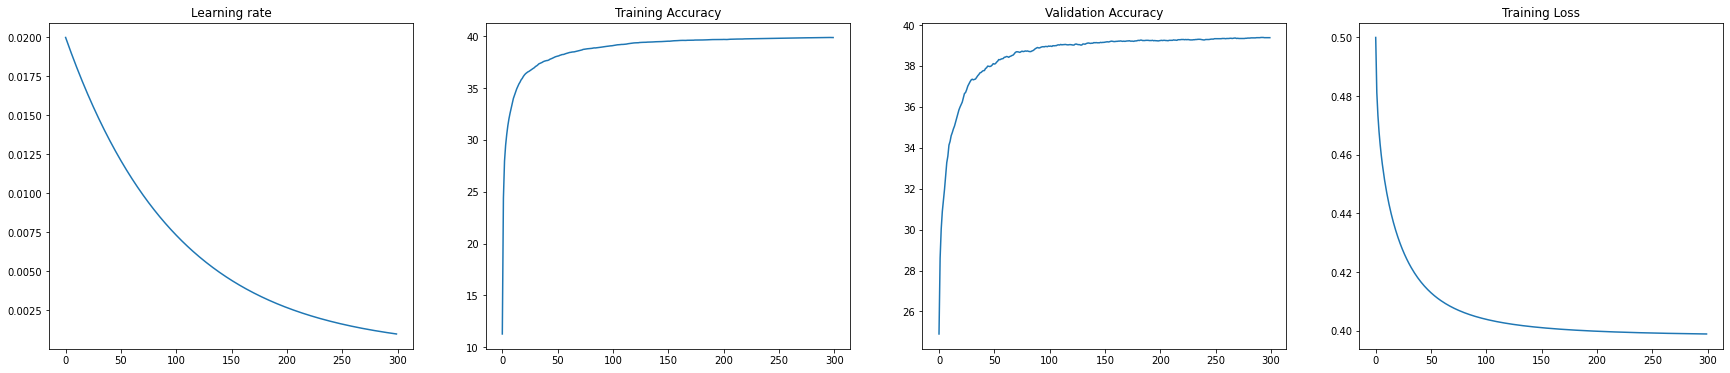

In [6]:
## Plotting the data with Epochs performed

#the weights matrix is inserted with the bias. lets remove it
w1_new = w1[1:,]
w1_new = (((w1_new - np.min(w1_new))/(np.max(w1_new) - np.min(w1_new)))*255).astype('uint8')

print(w1_new.shape)
#https://stackoverflow.com/questions/48178884/min-max-normalisation-of-a-numpy-array
#curves = np.reshape(w1, (K,32,32,3))
titles = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
images = [w1_new[:,i] for i in range(K)]

plt.figure(figsize = (15,6))
for i in range(10):
    plt.subplot(2, 5, i+1)# here we use subplot not subplots. directly addressing the subplot

    img = np.reshape(images[i], (32,32,3))
    plt.imshow(img)#imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]); plt.yticks([])
    #plt.savefig('Figures/1.Images of w1.png')
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------
titles = ['Learning rate' ,'Training Accuracy', 'Validation Accuracy', 'Training Loss']
curves = [lr_history, train_acc_history, val_acc_history, loss_history]
plt.figure(figsize = (30,6))
for i in range(4):
    plt.subplot(1, 4, i+1)# here we use subplot not subplots. directly addressing the subplot
    plt.plot(curves[i])#imshow(images[i])
    plt.title(titles[i])
    #plt.savefig('Figures/2.curves.png')
plt.show()
#-----------------------------------------------------------------------------------------------------------------------------